In [1]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
import numpy as np

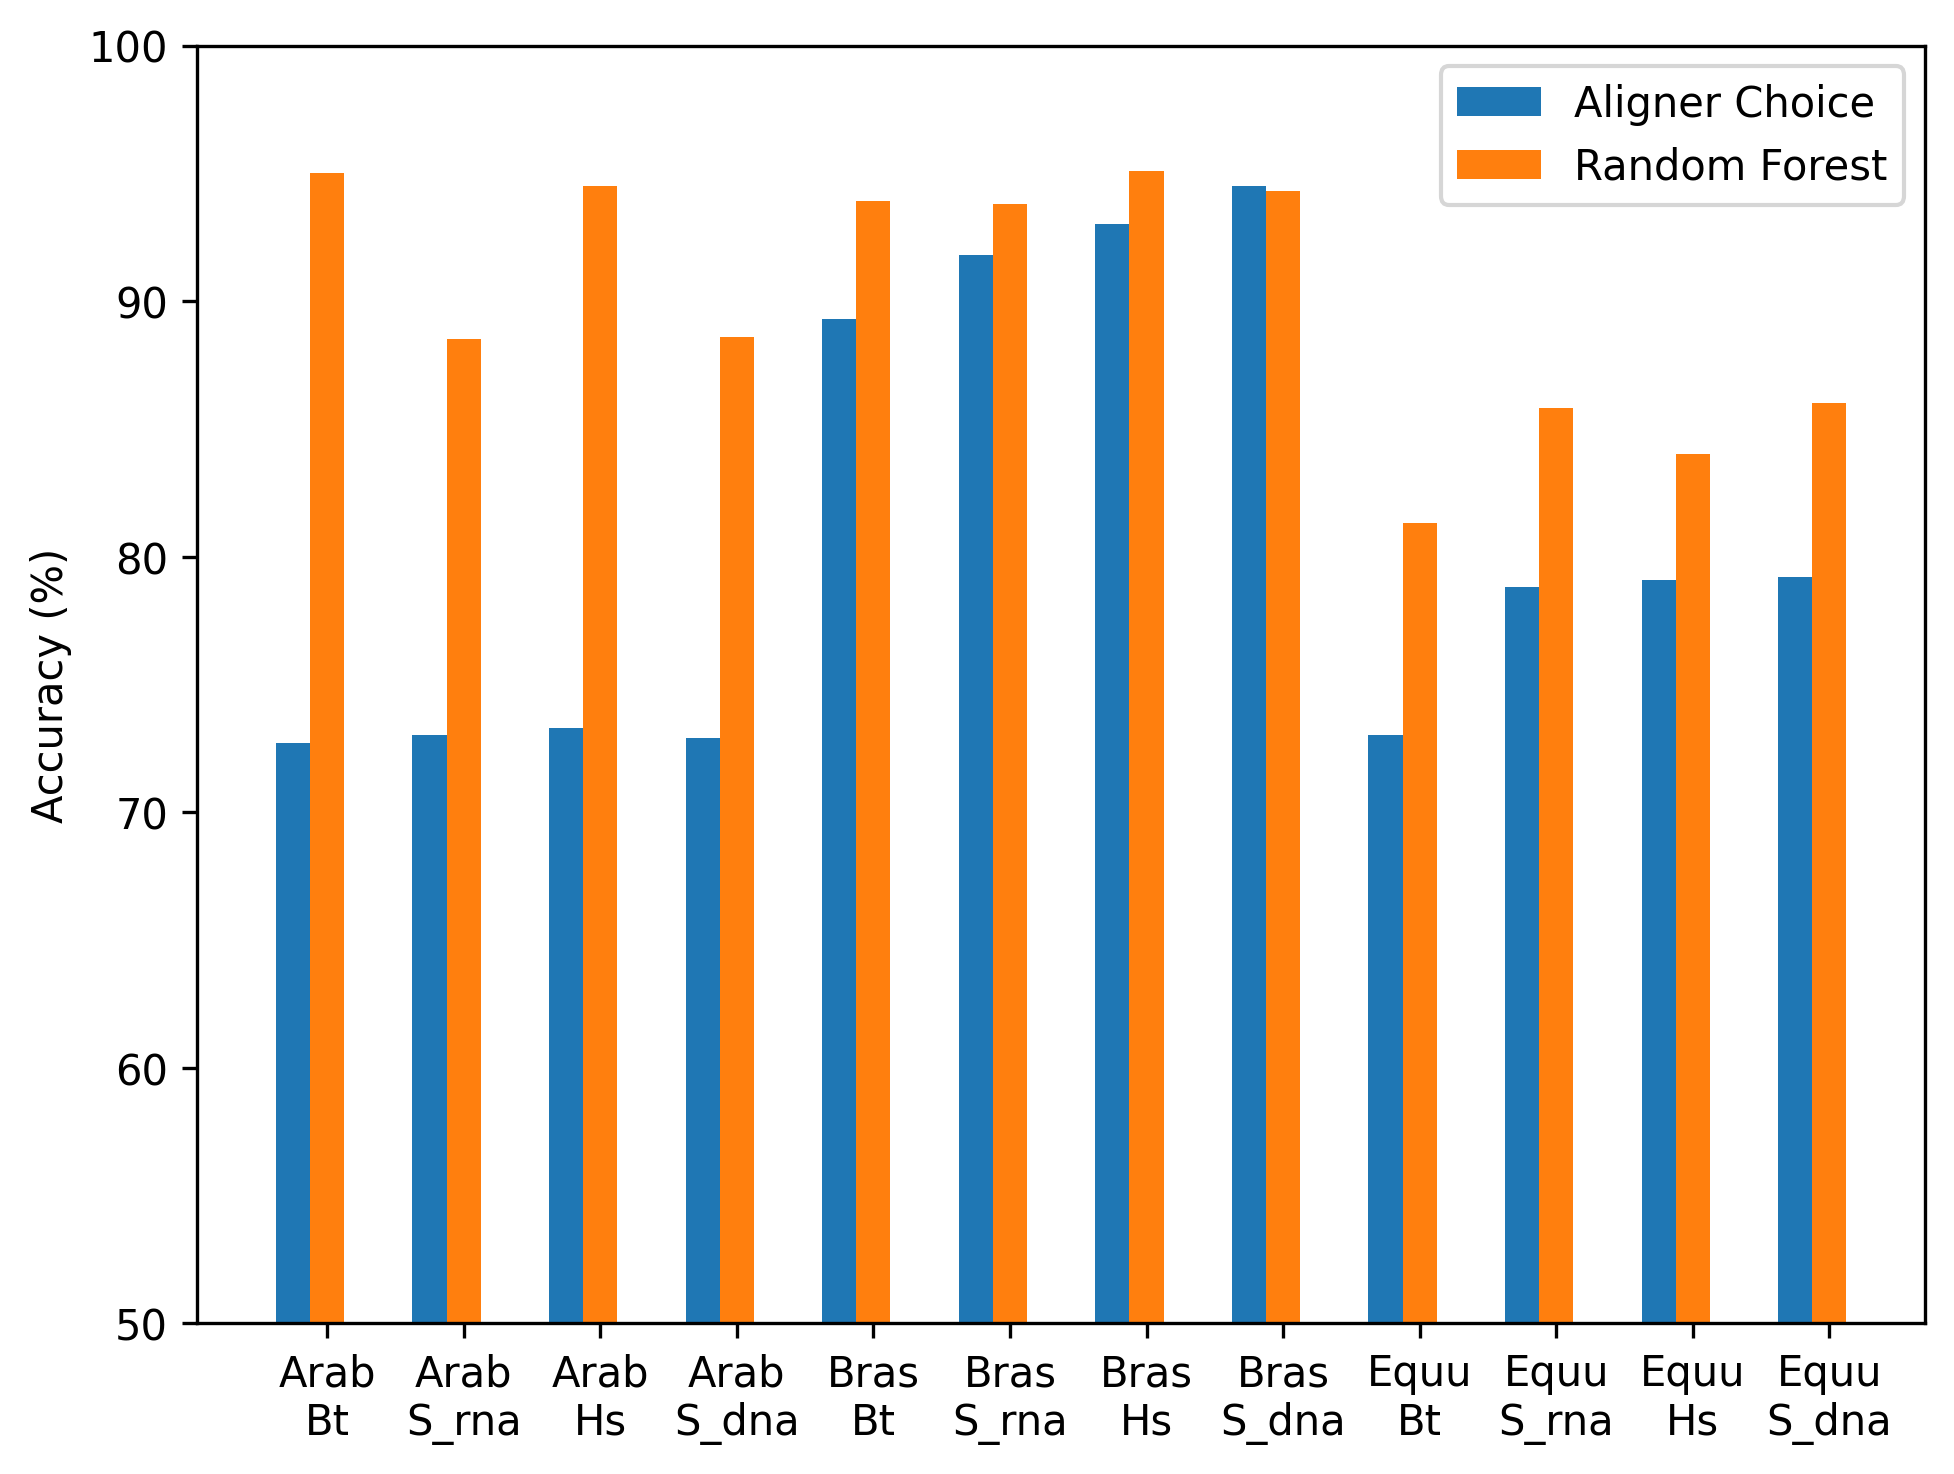

In [3]:
# In revision, show them all

species = (
            "Arab\nBt",
            "Arab\nS_rna",
            "Arab\nHs",
            "Arab\nS_dna",
            "Bras\nBt",
            "Bras\nS_rna",
            "Bras\nHs",
            "Bras\nS_dna",
            "Equu\nBt",
            "Equu\nS_rna",
            "Equu\nHs",
            "Equu\nS_dna"
            )
penguin_means = {
    'Aligner Choice': (72.7, 73.0, 73.3, 72.9, 89.3, 91.8, 93.0, 94.5, 73.0, 78.8, 79.1, 79.2),
     'Random Forest': (95.0, 88.5, 94.5, 88.6, 93.9, 93.8, 95.1, 94.3, 81.3, 85.8, 84.0, 86.0),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
#ax.set_title('Best Result per Genus')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right')
ax.set_ylim(50, 100)

plt.savefig('Figure2.300dpi.png')
plt.savefig('Figure2.300dpi.jpeg')
plt.show()

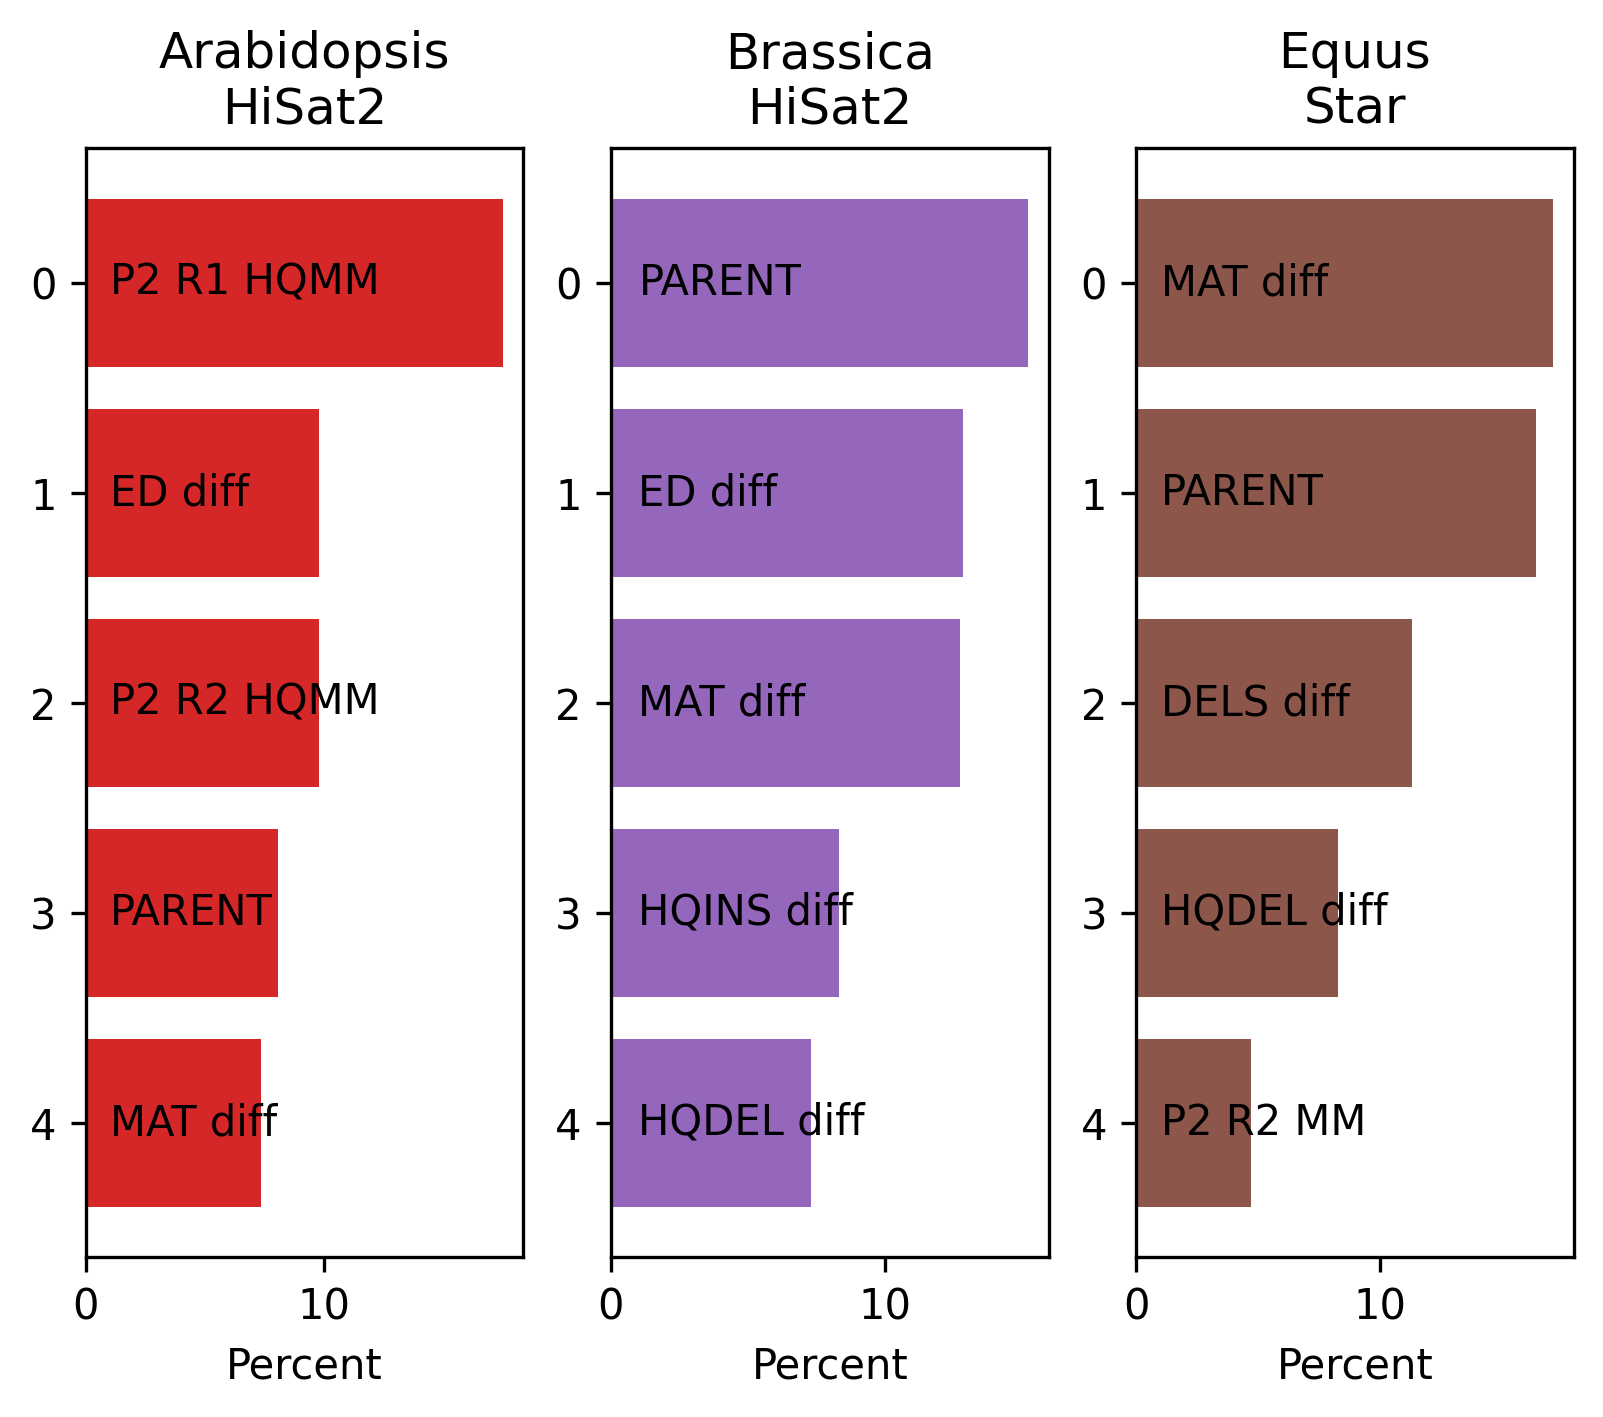

In [4]:
from itertools import cycle

def make_fig(ax,feature,importance,title,colors):
    y_pos = np.arange(len(feature))
    ax.barh(y_pos, importance, color=next(colors))
    #ax.set_yticks(y_pos, labels=feature)
    for i in range(len(feature)):
        ax.text(1,i,feature[i],va='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Percent')
    ax.set_title(title)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#fig.suptitle('Feature Importance')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = cycle(prop_cycle.by_key()['color'])
next(colors)
next(colors)
next(colors)
# ax1
feature = ('P2 R1 HQMM', 'ED diff', 'P2 R2 HQMM', 'PARENT', 'MAT diff')
importance = (17.5100, 09.8090, 09.7806, 08.0771, 07.3395)
title='Arabidopsis\nHiSat2'
make_fig(ax1,feature,importance,title,colors)
# ax2
feature = ('PARENT', 'ED diff', 'MAT diff', 'HQINS diff', 'HQDEL diff')
importance = (15.1929, 12.8219, 12.7299, 08.3194, 07.2824)
title='Brassica\nHiSat2'
make_fig(ax2,feature,importance,title,colors)
# ax3
feature = ('MAT diff', 'PARENT', 'DELS diff', 'HQDEL diff', 'P2 R2 MM')
importance = (17.0792, 16.3793, 11.2903, 08.2859, 04.7182)
title='Equus\nStar'
make_fig(ax3,feature,importance,title,colors)

plt.savefig('Figure3.300dpi.png')
plt.savefig('Figure3.300dpi.jpeg')
plt.show()